# Random variable generation

### Uniform simulation

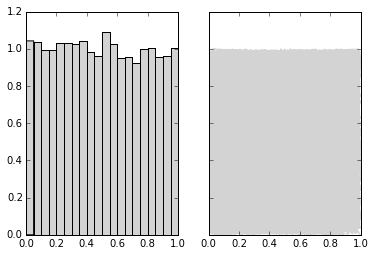

In [189]:
nsim = 10000
s  = np.random.uniform(0.0,1.0,nsim)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(s, 20, normed=True,color='lightgrey')
ax2.plot(s[0:nsim-2],s[1:nsim-1],color='lightgrey') #pairwise plot
plt.show()

## Inverse Transform

There is a simple, sometimes useful transformation, known as the *probability integral transform*, that allows us to transform any random variable into a uniform random variable and, more importantly, vice versa.For example, if $X$ has density $f$ and cdf $F$ , then we have the relation

$F(x) = \int_{-\infty}^x f(t) dt$ 

If $U ∼ U_{[0,1]}$ then $F^{-1}(U) = X$.

Since $F$ is invertible and $\mathbb{P}(U \leq u) = u$, we have 

$\mathbb{P}(X \leq x) = \mathbb{P}(F^{-1}(U) \leq x) = \mathbb{P}(U \leq F(x)) = F(x)$ 

e.g. if $X ∼ \mathcal{Exp}(1)$, then $F(x) = 1−e^{−x}$. Solving for x in $u = 1−e^{−x}$ gives $x = −log(1 − u)$. Therefore, if $U ∼ U[0,1]$, then

$X = −log(1-U) ∼ \mathcal{Exp}(1)$

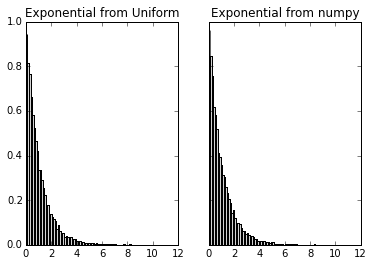

In [190]:
nsim = 10000
U  = np.random.uniform(0.0,1.0,nsim)
X = -1.0*np.log(1.0-U)
Y = np.random.exponential(1.0,nsim)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("Exponential from Uniform")
ax1.hist(X, 100, range = (0,12),normed=True,color='lightgrey')
ax2.set_title("Exponential from numpy")
ax2.hist(Y, 100, range = (0,12), normed=True,color='lightgrey')
plt.show()

## General transformation methods

When a distribution with density $f$ is linked in a relatively simple way to another distribution that is easy to simulate, this relationship can often be exploited to construct an algorithm to simulate variables from $f$.
e.g. some of the random variables that can be generated starting from an exponential distribution. If the $X_i$’s are iid $\mathcal{Exp}(1)$ random variables, then ChiSquare distribution can be derived as

$Y = 2\sum_{j=1}^{\nu}~\mathcal{X}^2_{2\nu}$, $v \in \mathcal{N}$

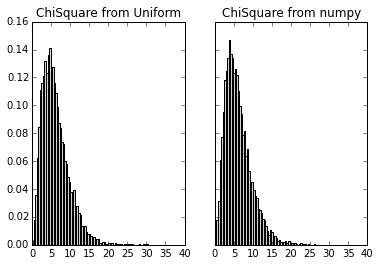

In [191]:
nsim = 10000
U  = np.random.uniform(0.0,1.0,(nsim,3))
X = -1.0*np.log(U)
X = 2*np.apply_along_axis(np.sum,1,X)
Y = np.random.chisquare(6,nsim)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("ChiSquare from Uniform")
ax1.hist(X, 100, range = (0,40),normed=True,color='lightgrey')
ax2.set_title("ChiSquare from numpy")
ax2.hist(Y, 100, range = (0,40), normed=True,color='lightgrey')
plt.show()

### Box-Muller algorithm

If $U_1$ and $U_2$ are iid $\mathcal{U}_{[0,1]}$, the variables $X_1$ and $X_2$ defined by 

$X_1 = 􏰒\sqrt{−2 log(U_1)} cos(2 \pi U_2) , X_2 = \sqrt{􏰒−2 log(U_1)} sin(2 \pi U_2)$ ,

are then iid $\mathcal{N} (0, 1)$ by virtue of a simple change of variable argument.

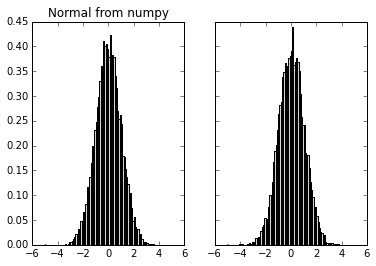

In [192]:
import math 
nsim = 10000
U1  = np.random.uniform(0.0,1.0,nsim)
U2  = np.random.uniform(0.0,1.0,nsim)
X1 = np.sqrt(-2.0*np.log(U1))*np.cos(2*math.pi*U2)
X2 = np.sqrt(-2.0*np.log(U1))*np.sin(2*math.pi*U2)
Y = np.random.normal(0,1,nsim)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("Normal$(X_1)$ from Uniform")
ax1.hist(X1, 100, range= (-5,5),normed=True,color='lightgrey')
ax1.set_title("Normal from numpy")
ax2.hist(Y, 100,range= (-5,5), normed=True,color='lightgrey')
plt.show()

### Multivariate normal simulation

The simulation of a multivariate normal distribution $\mathcal{N}_p(μ,Σ)$, where $Σ$ is a $p × p$ symmetric and positive-definite matrix, can be derived from the generic normal random variate generator in that using a Cholesky decomposition of $Σ$ (that is, $Σ = AA^T$) and taking the transform by $A$ of an iid normal vector of di- mension $p$ leads to a $\mathcal{N}_p(0, Σ)$ normal vector. 

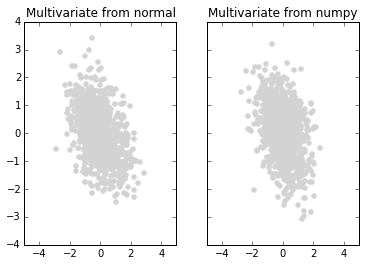

In [186]:
nsim = 1000
sigma = np.cov(np.random.normal(0,1,size=(2,10)))
A = np.transpose(np.linalg.cholesky(sigma))
X = np.array([np.dot(A,np.random.normal(0,1,size=(2,1))) for i in range(nsim)])
Y = np.random.multivariate_normal([0,0], sigma, nsim)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("Multivariate from normal")
ax1.set_xlim(-5,5)
ax1.scatter(X[:,0],X[:,1],color='lightgrey')
ax2.set_title("Multivariate from numpy")
ax2.set_xlim(-5,5)
ax2.scatter(Y[:,0],Y[:,1],color='lightgrey')
plt.show()

## Discrete distributions

Using the inverse transform principle a generic algorithm that will formally work for any discrete distribution can be constructed.
To generate $X ∼ P_θ$, where $P_θ$ is supported by the integers, we can calculate—once for all, assuming we can store them—the probabilities
$p_0 =P_θ(X≤0), p_1 =P_θ(X≤1), p_2 =P_θ(X≤2), ...,$ and then generate $U ∼ U_{[0,1]}$ and take

$X = k, if p_{k−1} < U < p_k$.

## Mixture representations

It is sometimes the case that a probability distribution can be naturally represented as a mixture distribution; that is, we can write it in the form

$f(x) = \int_{\mathcal{\gamma}} g(x|y)p(y) dy$ or $f(x) = \sum_{i \in \gamma} p_if_i(x)$ 

depending on whether the auxiliary space $\mathcal{\gamma}$ is continuous or discrete where $g$ and $p$ are standard distributions that can be easily simulated.To generate a random variable X using such a representation, we can first generate a variable $Y$ from the mixing distribution and then generate $X$ from the selected conditional distribution. That is,

if $y ∼ p(y)$ and $X ∼ f(x|y)$, then $X ∼ f(x)$ (if continuous); 

if $\gamma ∼P(\gamma=i)=p_i$ and $X∼f_{\gamma}(x)$,then $X∼f(x)(ifdiscrete)$.

For instance, we can write Student’s t density with $\nu$ degrees of freedom $T_{\nu}$ as a mixture, where

$X|y ∼ \mathcal{N}(0,\nu/y)$ and $Y ∼ \mathcal{X}^2_{\nu}$.

Generating from a $T_{\nu}$ distribution could then amount to generating from a $\mathcal{X}^2_{\nu}$ distribution and then from the corresponding normal distribution.

e.g. if $X$ is a negative binomial random variable, $X ∼ \mathcal{N}eg(n, p)$, then $X$ has the mixture representation

$X|y ∼ \mathcal{P}(y)$ and $Y ∼ \mathcal{G}(n, β)$ where $\beta = (1-p)/p$.

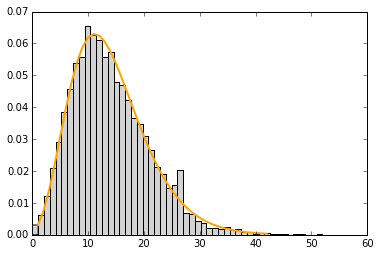

In [194]:
from scipy.stats import nbinom
nsim=10000
n=6
p=0.3
y=np.random.gamma(n,(1.0-p)/p,nsim)
x=np.random.poisson(y)
plt.figure()
plt.hist(x,50,normed=True,color='lightgrey')
x = np.arange(nbinom.ppf(0.001, n, p),nbinom.ppf(0.999, n, p))
plt.plot(x, nbinom.pmf(x, n, p),color='orange',linewidth=2)
plt.show()         

## Accept–reject methods

There are many distributions for which the inverse transform method and even general transformations will fail to be able to generate the required random variables. For these cases, we must turn to indirect methods; that is, methods in which we generate a candidate random variable and only accept it subject to passing a test. As we will see, this class of methods is extremely powerful and will allow us to simulate from virtually any distribution.

These so-called Accept–Reject methods only require us to know the functional form of the density $f$ of interest (called the target density) up to a multiplicative constant. We use a simpler (to simulate) density $g$, called the *instrumental* or *candidate density*, to generate the random variable for which the simulation is actually done. The only constraints we impose on this candidate density g are that

1. f and g have compatible supports (i.e., $g(x) > 0$ when $f(x) > 0$).

2. There is a constant $M$ with $f(x)/g(x) \leq M$ for all $x$.

In this case, $X$ can be simulated as follows. First, we generate $Y ∼ g$ and, independently, we generate $U ∼ U_{[0,1]}$. If 

$U \leq \frac{1}{M} \frac{f(Y)}{g(Y)}$

then we set $X = Y$. If the inequality is not satisfied, we then discard $Y$ and U and start again. Succinctly, the algorithmic representation of the Accept– Reject method is as follows:

1. Generate $Y ∼ g, U ∼ U_{[0,1]}$

2. Accept $X=Y$ if $U \leq f(Y)/Mg(Y) $

3. Return to 1 otherwise.

e.g. random variates can be generated from the beta distribution using the Accept-Reject method using as the instrumental distribution the uniform $U_{[0,1]}$ distribution when both $α$ and $β$ are larger than 1.

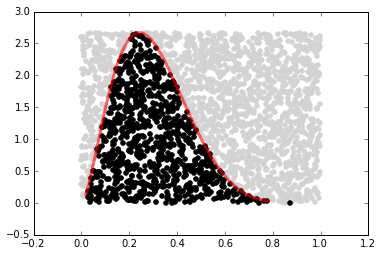

In [197]:
from scipy.stats import beta
nsim=2500
a=2.7
b=6.3
M=2.67
u=np.random.uniform(0,M,nsim)
y=np.random.uniform(0,1,nsim)
t = np.less(u,beta.pdf(y,a,b))
x = y[t]
plt.figure()
plt.scatter(y,u,color='lightgrey')
plt.scatter(x,u[t],color='black')
x = np.linspace(beta.ppf(0.001, a, b), beta.ppf(0.999, a, b), 1000)
plt.plot(x, beta.pdf(x, a, b), color='red',lw=3, alpha=0.6)
plt.show()

In [143]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()